# Logistic regression defination:

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

# Difference Logistic regression Vs Linear regression

Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical.

In [1]:
%%html
<h1>Classification Problem:-</h1>
<p>Example:</P>

<li>1.Email is spam or not</li>
<li>2.Will customer buy life insurance?</li>
<li>3.Which party person is going to vote for?</li>
<ul>
<li>Democratic</li>
<li>Republican</li>
<li>Independent</li>
</ul>
<p>Predicted value is categorical.</p>

<p>Logistic regression is on of the technique used for Classification problem.</p>

# Classification Types:

In [2]:
%%html
<h2> Binary Classification</h1>
<p> Will customer by life insurance?
<ul>
<li>Yes
<li>No
</ul>


In [3]:
%%html
<h2> MultiClass Classification:</h1>
<p> Which party a person is going to vote for?</p>
<ul>
<li>Democratic</li>
<li>Republican</li>
<li>Independent</li>
</ul>


In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


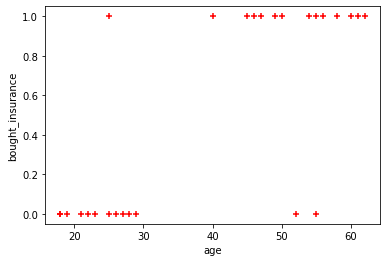

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.scatter(df["age"],df["bought_insurance"], color ='red', marker='+')

In [7]:
df.shape

(27, 2)

In [8]:
X = df[['age']]
y = df[['bought_insurance']]

In [9]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [10]:
X_test

,age
19,18
13,29
4,46


In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [12]:
model.predict(X_test)

array([0, 0, 1], dtype=int64)

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
#Predict probability
model.predict_proba(X_test)


array([[0.93112905, 0.06887095],
       [0.7730313 , 0.2269687 ],
       [0.2879948 , 0.7120052 ]])

In [15]:
#40 age people do the insurance [1] and [0] mins no
model.predict([[40]])

array([1], dtype=int64)

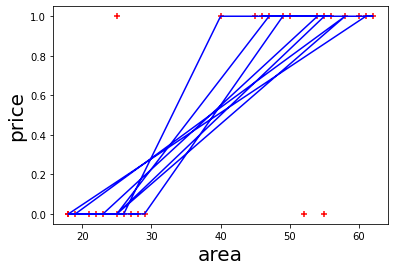

In [16]:
%matplotlib inline
#Make label area and price
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.age,df.bought_insurance, color ='red', marker='+') 

plt.plot(df.age,model.predict(df[['age']]),color='blue')


0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [17]:
model.predict([[35]])

array([0], dtype=int64)

# Lets defined sigmoid function now and do the math with hand

In [18]:
print(f"Coefi m: {model.coef_}")
print(f"Intercept b : {model.intercept_}")

Coefi m: [[0.12533236]]
Intercept b : [-4.86014596]


In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [21]:
#0.485 is less than 0.5 which means person with 35 age will not buy insurance
age = 35
prediction_function(age)

0.4850044983805899

In [22]:
#0.485 is more than 0.5 which means person with 43 will buy the insurance
age = 43
prediction_function(age)

0.568565299077705